In [ ]:
#unziping the file
!unzip /content/drive/MyDrive/Train.zip -d /content/drive/MyDrive/skin_disease

Archive:  /content/drive/MyDrive/Train.zip
   creating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0025780.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0025803.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0025825.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0025953.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0025957.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0025992.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0026040.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0026149.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/actinic keratosis/ISIC_0026171.jpg  
  inflating: /content/drive/MyDrive/skin_disease/Train/

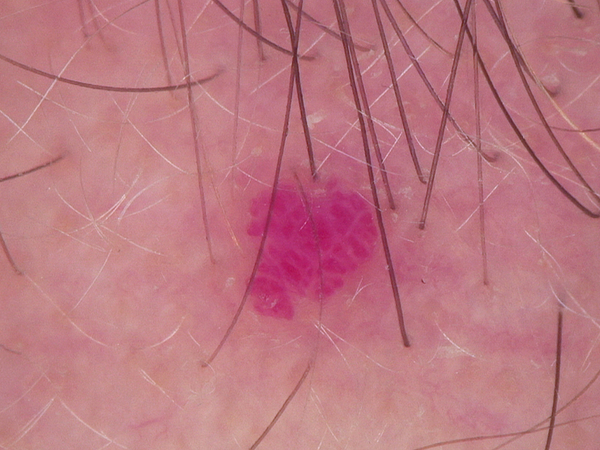

(450, 600, 3)


In [ ]:
#Viewing the image
import cv2
from google.colab.patches import cv2_imshow
a=cv2.imread("/content/drive/MyDrive/skin_disease/Train/vascular lesion/ISIC_0024475.jpg")
cv2_imshow(a)
print(a.shape)

# CNN

In [ ]:
#Neural Network Architecture
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=models.Sequential()  #Sequential Model
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(200, 200, 3)))  #Convolution Layer
model.add(MaxPooling2D((2,2))) #Pooling Layer
model.add(Conv2D(64,(3,3),activation="relu")) #Convolution Layer
model.add(MaxPooling2D((2,2))) #Pooling Layer
model.add(Conv2D(128,(3,3),activation="relu"))  #Convolution Layer
model.add(MaxPooling2D((2,2))) #Pooling Layer
model.add(Conv2D(128,(3,3),activation="relu"))  #Convolution Layer
model.add(MaxPooling2D((2,2)))#Pooling Layer
model.add(Flatten()) #Flattening
model.add(Dense(256,activation="relu")) #Dense Layer
model.add(Dense(256,activation="relu"))  #Dense Layer
model.add(Dense(128,activation="relu")) #Dense Layer
model.add(Dense(9,activation="softmax")) #Output Layer
model.summary() #Model Summary

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 128)     

In [ ]:
#Compiling the Model
model.compile(optimizer="Adam",loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
#ImageDataGenerator to access Image from Specified Directory
from keras.preprocessing.image import ImageDataGenerator
x_train_datagen=ImageDataGenerator(rescale=1./255)
x_val_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Specifying the Train, Test Directory Path , and image size
train_datagen=x_train_datagen.flow_from_directory("/content/drive/MyDrive/skin_disease/Train",
                                                  target_size=(200,200),batch_size=128,class_mode="sparse")
val_datagen=x_val_datagen.flow_from_directory("/content/drive/MyDrive/skin_disease/Test",
                                                 target_size=(200,200),batch_size=128,class_mode="sparse")

Found 1366 images belonging to 9 classes.
Found 1366 images belonging to 9 classes.


In [ ]:
# dir(train_datagen)
for i in train_datagen.classes[::]:
  print(i,end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
#Training the model and saving the history in variable named h
h=model.fit(train_datagen,epochs=30)

Epoch 1/30
11/11 [==============================] - 30s 3s/step - loss: 0.2753 - accuracy: 0.8968
Epoch 2/30
11/11 [==============================] - 27s 2s/step - loss: 0.2958 - accuracy: 0.8931
Epoch 3/30
11/11 [==============================] - 28s 2s/step - loss: 0.2679 - accuracy: 0.9034
Epoch 4/30
11/11 [==============================] - 27s 2s/step - loss: 0.2134 - accuracy: 0.9143
Epoch 5/30
11/11 [==============================] - 27s 2s/step - loss: 0.2053 - accuracy: 0.9180
Epoch 6/30
11/11 [==============================] - 27s 3s/step - loss: 0.1360 - accuracy: 0.9480
Epoch 7/30
11/11 [==============================] - 27s 2s/step - loss: 0.1045 - accuracy: 0.9517
Epoch 8/30
11/11 [==============================] - 27s 3s/step - loss: 0.1082 - accuracy: 0.9575
Epoch 9/30
11/11 [==============================] - 27s 2s/step - loss: 0.0996 - accuracy: 0.9568
Epoch 10/30
11/11 [==============================] - 27s 3s/step - loss: 0.0894 - accuracy: 0.9649
Epoch 11/30
11/11 [

In [ ]:
#Evaluating the model Performance
model.evaluate(val_datagen)

11/11 [==============================] - 27s 2s/step - loss: 0.0445 - accuracy: 0.9714


[0.044476065784692764, 0.9714494943618774]

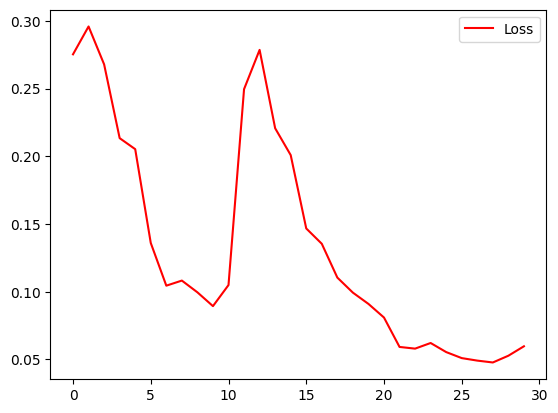

In [ ]:
#Plotting the Loss
import matplotlib.pyplot as plt
plt.plot(h.history["loss"],color="red")
# plt.plot(h.history["accuracy"],color="green")
plt.legend(["Loss"],loc="upper right")
plt.show()

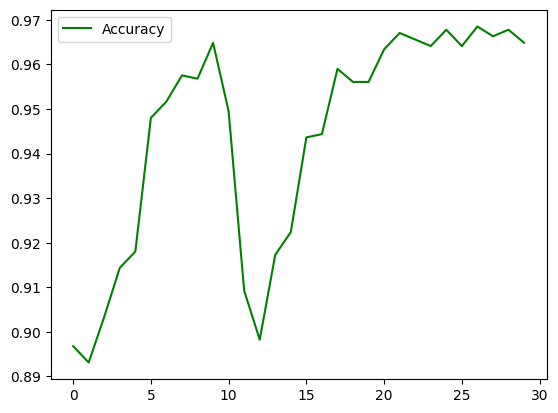

In [ ]:
#plotting the Accuracy 
import matplotlib.pyplot as plt
plt.plot(h.history["accuracy"],color="green")
plt.legend(["Accuracy"])
plt.show()

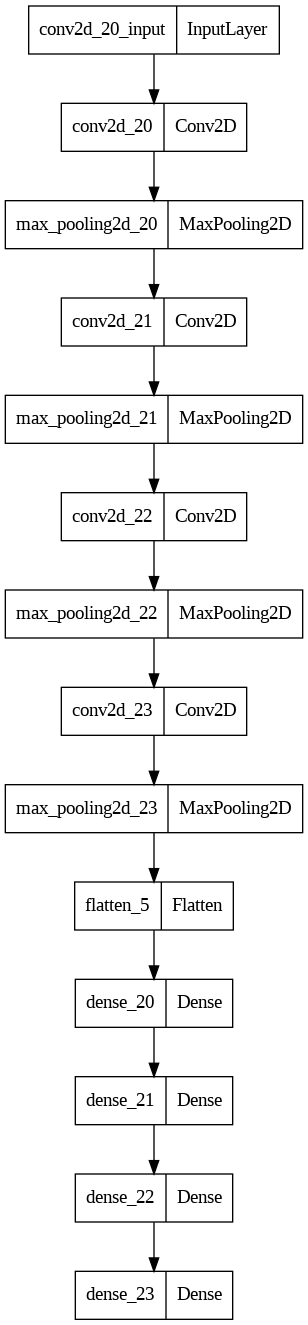

In [ ]:
#Diagrammatic representation of Neural Network
from keras.utils import plot_model
plot_model(model)

In [ ]:
#Saving the Model
model.save("model1.h5")

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


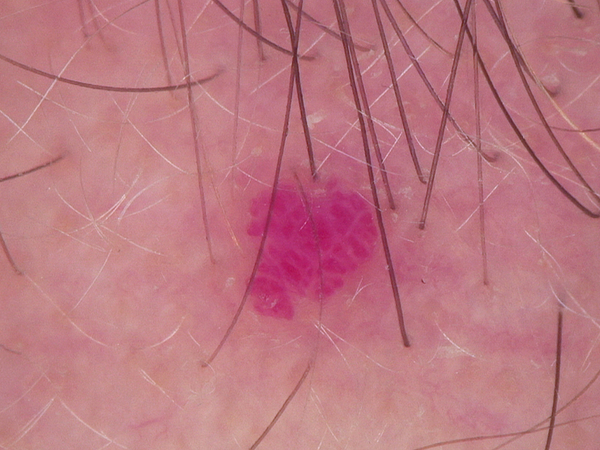

In [ ]:
#Prediction
import numpy as np
from keras.utils import load_img, img_to_array
a="/content/drive/MyDrive/skin_disease/Train/vascular lesion/ISIC_0024475.jpg" #image path
test_image = load_img(a, target_size=(200,200)) #loading the image
test_image =img_to_array(test_image) #converting image to array
test_image = np.expand_dims(test_image, axis = 0) #expanding the dimension
result = model.predict(test_image) #predicting img
print(result)
b=cv2.imread(a)
cv2_imshow(b) #Viewing the Image

# VGG 19

In [ ]:
#Transfer Learning
classifier = models.Sequential()

pre_trained_model = keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(200,200,3),
    pooling="avg",
    classes=1
)
for layer in pre_trained_model.layers:
    layer.trainable = False  #Since its a Pretrained Model, we are retaining the weights and top most layers ie. Conv & MaxPool
classifier.add(pre_trained_model)
classifier.add(keras.layers.Flatten()) #Flattening
classifier.add(keras.layers.Dense(512, activation = "relu")) #Dense
classifier.add(keras.layers.Dense(128, activation = "relu"))  #Dense
classifier.add(keras.layers.Dense(9,activation = "softmax")) #Output Layer

classifier.summary() #Model Summary

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_16 (Flatten)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 512)               262656    
                                                                 
 dense_54 (Dense)            (None, 128)               65664     
                                                                 
 dense_55 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 20,353,865
Trainable params: 329,481
Non-trainable params: 20,024,384
_________________________________________________________________


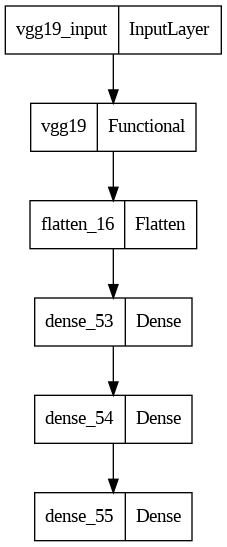

In [ ]:
#Visualizing the Model Architecture
from keras.utils import plot_model
plot_model(classifier)

In [ ]:
#Specifying train and test Directory along with Image Resizing
train_datagen1=x_train_datagen.flow_from_directory("/content/drive/MyDrive/skin_disease/Train",
                                                  target_size=(200,200),batch_size=128,class_mode="sparse")
val_datagen1=x_val_datagen.flow_from_directory("/content/drive/MyDrive/skin_disease/Test",
                                                 target_size=(200,200),batch_size= 128,class_mode="sparse")

Found 1366 images belonging to 9 classes.
Found 1366 images belonging to 9 classes.


In [ ]:
#Compiling the Model
classifier.compile(optimizer="Adam",loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
#Training the Model
h1=classifier.fit(train_datagen1,epochs=40)

Epoch 1/40
11/11 [==============================] - 29s 2s/step - loss: 2.2168 - accuracy: 0.1318
Epoch 2/40
11/11 [==============================] - 28s 2s/step - loss: 2.1211 - accuracy: 0.1728
Epoch 3/40
11/11 [==============================] - 28s 3s/step - loss: 2.0719 - accuracy: 0.2064
Epoch 4/40
11/11 [==============================] - 28s 3s/step - loss: 2.0293 - accuracy: 0.2269
Epoch 5/40
11/11 [==============================] - 28s 3s/step - loss: 1.9805 - accuracy: 0.2796
Epoch 6/40
11/11 [==============================] - 28s 3s/step - loss: 1.9353 - accuracy: 0.2899
Epoch 7/40
11/11 [==============================] - 28s 3s/step - loss: 1.9115 - accuracy: 0.2848
Epoch 8/40
11/11 [==============================] - 28s 2s/step - loss: 1.8678 - accuracy: 0.3243
Epoch 9/40
11/11 [==============================] - 28s 2s/step - loss: 1.8457 - accuracy: 0.3221
Epoch 10/40
11/11 [==============================] - 28s 3s/step - loss: 1.8059 - accuracy: 0.3521
Epoch 11/40
11/11 [

In [ ]:
#Evaluating the models Performance
classifier.evaluate(val_datagen1)

11/11 [==============================] - 28s 3s/step - loss: 1.3093 - accuracy: 0.5227


[1.3092535734176636, 0.5226939916610718]

# RESNET


In [ ]:
#RESNET50; Explination same as before ie. VGG19
classifier = models.Sequential()

pre_trained_model = keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(200,200,3),
    pooling="avg",
    classes=1
)
for layer in pre_trained_model.layers:
    layer.trainable = False
classifier.add(pre_trained_model)
classifier.add(keras.layers.Flatten())
classifier.add(keras.layers.Dense(512, activation = "relu"))
classifier.add(keras.layers.Dense(128, activation = "relu"))
classifier.add(keras.layers.Dense(9,activation = "softmax"))

classifier.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_17 (Flatten)        (None, 2048)              0         
                                                                 
 dense_56 (Dense)            (None, 512)               1049088   
                                                                 
 dense_57 (Dense)            (None, 128)               65664     
                                                                 
 dense_58 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 24,703,625
Trainable params: 1,115,913
Non-trainable params: 23,587,712
__________________________________

In [ ]:
classifier.compile(optimizer="Adam",loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
h1=classifier.fit(train_datagen1,epochs=10)

Epoch 1/10
11/11 [==============================] - 27s 2s/step - loss: 2.1640 - accuracy: 0.1493
Epoch 2/10
11/11 [==============================] - 27s 3s/step - loss: 2.1581 - accuracy: 0.1384
Epoch 3/10
11/11 [==============================] - 27s 2s/step - loss: 2.1586 - accuracy: 0.1435
Epoch 4/10
11/11 [==============================] - 27s 2s/step - loss: 2.1544 - accuracy: 0.1640
Epoch 5/10
11/11 [==============================] - 27s 2s/step - loss: 2.1655 - accuracy: 0.1340
Epoch 6/10
11/11 [==============================] - 27s 2s/step - loss: 2.1549 - accuracy: 0.1296
Epoch 7/10
11/11 [==============================] - 27s 2s/step - loss: 2.1581 - accuracy: 0.1428
Epoch 8/10
11/11 [==============================] - 27s 2s/step - loss: 2.1535 - accuracy: 0.1567
Epoch 9/10
11/11 [==============================] - 27s 2s/step - loss: 2.1589 - accuracy: 0.1413
Epoch 10/10
11/11 [==============================] - 27s 2s/step - loss: 2.1606 - accuracy: 0.1581


In [ ]:
classifier.evaluate(val_datagen1)

11/11 [==============================] - 35s 3s/step - loss: 2.1538 - accuracy: 0.1493


[2.153787851333618, 0.1493411362171173]

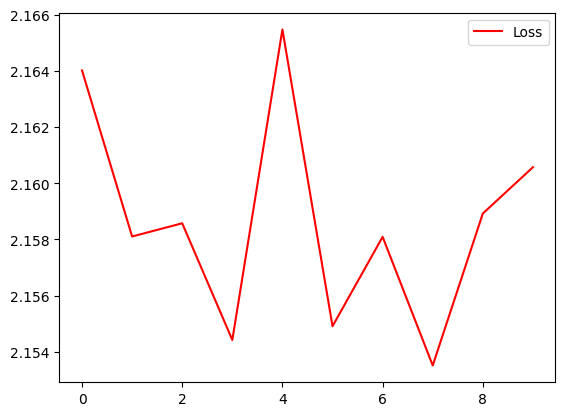

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h1.history["loss"],color="red")
# plt.plot(h.history["accuracy"],color="green")
plt.legend(["Loss"],loc="upper right")
plt.show()

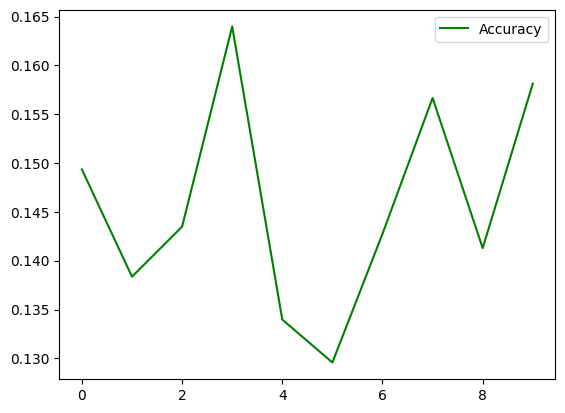

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h1.history["accuracy"],color="green")
plt.legend(["Accuracy"])
plt.show()